In [1]:
# load all needed libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Import the data

team_data = pd.read_csv("corrected_euro_team_data.csv")

team_data.head()


,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0


In [3]:
# Create a new column called "score_differential" that calculates ("team_score" - "opponent_score").

team_data['score_differential'] = team_data['team_score'] - team_data['opponent_score']

team_data


,id_match,date,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,score_differential
0,2036436,10/12/2023,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,0,20917,41.318403,19.823953,105,68,0,3
1,2040328,3/22/2024,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,3,21425,44.794981,10.338325,105,68,0,-3
2,2039019,10/17/2023,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,0,17232,41.318403,19.823953,105,68,0,2
3,2034801,6/13/2022,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,0,21425,41.318403,19.823953,105,68,0,0
4,2034569,9/27/2022,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,1,8800,41.318403,19.823953,105,68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2036412,9/11/2023,Qualifiers,0,WAL,-3.0,70000,LVA,-3.0,70000,2,0,6464,56.961378,24.116383,105,68,0,2
1116,2034452,6/8/2022,Nations,1,WAL,-3.0,70000,NED,0.1,1553,1,2,23395,51.474537,-3.200818,105,68,0,-1
1117,2036366,6/19/2023,Qualifiers,0,WAL,-3.0,70000,TUR,1.7,5515,0,2,28766,41.228006,36.457621,105,68,0,-2
1118,2034553,9/25/2022,Nations,1,WAL,-3.0,70000,POL,-0.1,17538,0,1,31520,51.474537,-3.200818,105,68,0,-1


In [4]:
# Convert 'date' column to datetime
team_data['date'] = pd.to_datetime(team_data['date'])

# Extract month and day of the week as separate columns
team_data['month'] = team_data['date'].dt.month
team_data['day_of_week'] = team_data['date'].dt.dayofweek
team_data['year'] = team_data['date'].dt.year

# Drop the original 'date' column
team_data.drop(columns=['date'], inplace=True)

team_data


,id_match,source,home_or_away,team_code,team_xG,team_odds,opponent_code,opponent_xG,opponent_odds,team_score,...,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,target_top_4,score_differential,month,day_of_week,year
0,2036436,Qualifiers,1,ALB,-2.2,48468,CZE,-1.4,15861,3,...,20917,41.318403,19.823953,105,68,0,3,10,3,2023
1,2040328,Friendlies,1,ALB,-2.2,48468,CHI,-3.0,70000,0,...,21425,44.794981,10.338325,105,68,0,-3,3,4,2024
2,2039019,Friendlies,1,ALB,-2.2,48468,BUL,-3.0,70000,2,...,17232,41.318403,19.823953,105,68,0,2,10,1,2023
3,2034801,Friendlies,1,ALB,-2.2,48468,EST,-3.0,70000,0,...,21425,41.318403,19.823953,105,68,0,0,6,0,2022
4,2034569,Nations,1,ALB,-2.2,48468,ISL,-3.0,70000,1,...,8800,41.318403,19.823953,105,68,0,0,9,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2036412,Qualifiers,0,WAL,-3.0,70000,LVA,-3.0,70000,2,...,6464,56.961378,24.116383,105,68,0,2,9,0,2023
1116,2034452,Nations,1,WAL,-3.0,70000,NED,0.1,1553,1,...,23395,51.474537,-3.200818,105,68,0,-1,6,2,2022
1117,2036366,Qualifiers,0,WAL,-3.0,70000,TUR,1.7,5515,0,...,28766,41.228006,36.457621,105,68,0,-2,6,0,2023
1118,2034553,Nations,1,WAL,-3.0,70000,POL,-0.1,17538,0,...,31520,51.474537,-3.200818,105,68,0,-1,9,6,2022


In [5]:
# Drop string columns and target column.

team_data.drop(columns=['id_match'], inplace=True)
team_data.drop(columns=['target_top_4'], inplace=True)
team_data.drop(columns=['source'], inplace=True)
team_data.drop(columns=['team_code'], inplace=True)
team_data.drop(columns=['opponent_code'], inplace=True)

# team_data.drop(columns=['match_attendance'], inplace=True)
# team_data.drop(columns=['stadium_latitude'], inplace=True)
# team_data.drop(columns=['stadium_longitude'], inplace=True)
# team_data.drop(columns=['stadium_pitch_length'], inplace=True)
# team_data.drop(columns=['stadium_pitch_width'], inplace=True)
# team_data.drop(columns=['month'], inplace=True)
# team_data.drop(columns=['day_of_week'], inplace=True)
# team_data.drop(columns=['year'], inplace=True)

team_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   home_or_away          1120 non-null   int64  
 1   team_xG               1120 non-null   float64
 2   team_odds             1120 non-null   int64  
 3   opponent_xG           1120 non-null   float64
 4   opponent_odds         1120 non-null   int64  
 5   team_score            1120 non-null   int64  
 6   opponent_score        1120 non-null   int64  
 7   match_attendance      1120 non-null   int64  
 8   stadium_latitude      1120 non-null   float64
 9   stadium_longitude     1120 non-null   float64
 10  stadium_pitch_length  1120 non-null   int64  
 11  stadium_pitch_width   1120 non-null   int64  
 12  score_differential    1120 non-null   int64  
 13  month                 1120 non-null   int32  
 14  day_of_week           1120 non-null   int32  
 15  year                 

In [6]:
# Select all columns for scaling
columns_to_scale = team_data.columns

# Initialize the scaler
scaler = StandardScaler()  # Or use MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(team_data), columns=columns_to_scale)


In [7]:
# Try removing the rows related to teams that did not qualify for competion. These have odds value of 0.808564

print(f'full set are {len(df_scaled)} rows.')
df_scaled = df_scaled.loc[(df_scaled['team_odds'] < 0.8) | (df_scaled['opponent_odds'] < 0.8)]

#df_scaled = df_scaled.loc[df_scaled['team_odds'] < 70000 | df_scaled['opponent_odds'] < 70000]
print(f'after removing the non-qualifying teams we are down to {len(df_scaled)} rows.')

full set are 1120 rows.
after removing the non-qualifying teams we are down to 742 rows.


## Unsupervised learning

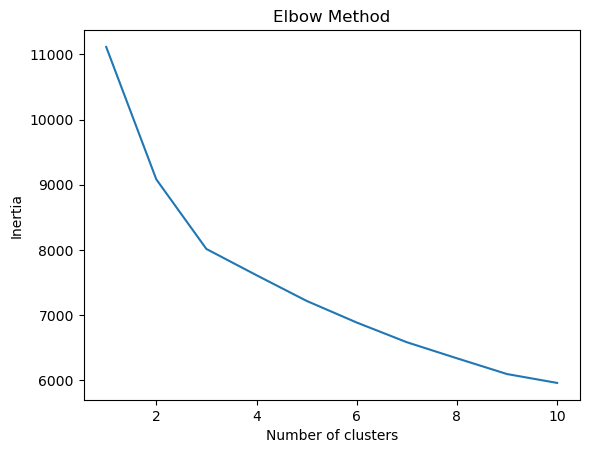

In [8]:
# Determine the optimal number of clusters using the elbow method

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=2000, n_init=100, random_state=42,algorithm='lloyd')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [9]:
# Assume the optimal number of clusters (k) is determined to be 4
optimal_clusters = 4 

# Apply k-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='random', max_iter=1000, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataframe
df_scaled['cluster'] = cluster_labels

df_scaled.head()


,home_or_away,team_xG,team_odds,opponent_xG,opponent_odds,team_score,opponent_score,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,score_differential,month,day_of_week,year,cluster
0,1.0,-0.286851,0.087417,0.179607,-1.004651,1.123480,-0.974849,-0.030950,-0.574818,0.319044,0.07581,0.108648,1.309976,1.181897,0.008835,0.114177,0
1,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,1.123480,-0.000003,-0.205470,-0.274178,0.07581,0.108648,-1.309976,-1.467066,0.503582,1.535044,3
2,1.0,-0.286851,0.087417,-0.753310,0.808564,0.424037,-0.974849,-0.255444,-0.574818,0.319044,0.07581,0.108648,0.873317,1.181897,-0.980659,0.114177,1
3,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,-0.974849,-0.000003,-0.574818,0.319044,0.07581,0.108648,0.000000,-0.331796,-1.475405,-1.306690,1
4,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.275406,-0.275406,-0.769129,-0.574818,0.319044,0.07581,0.108648,0.000000,0.803474,-0.980659,-1.306690,1


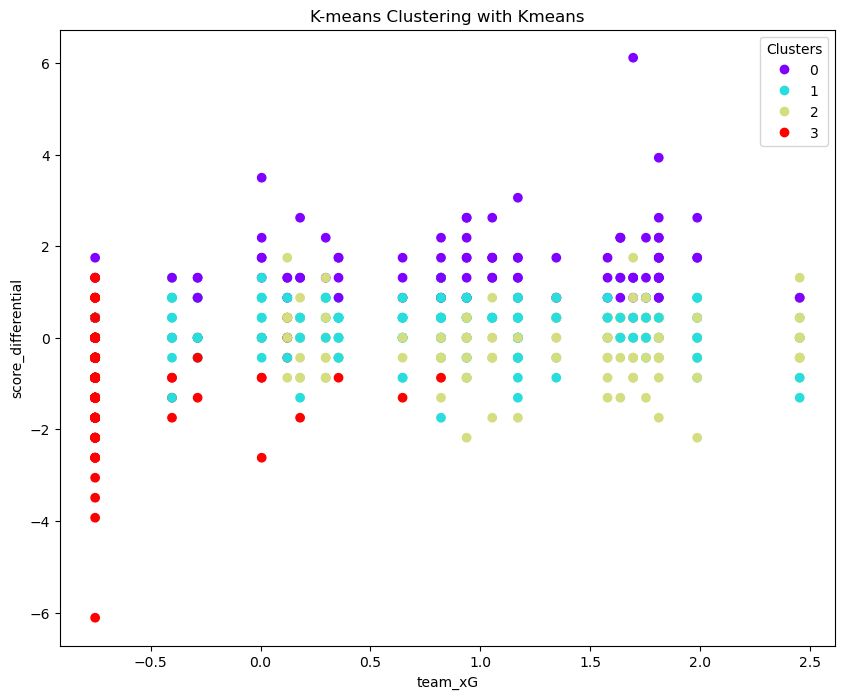

In [10]:
# Plot the clusters

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_scaled['team_xG'], df_scaled['score_differential'], c=df_scaled['cluster'], cmap='rainbow')
plt.title('K-means Clustering with Kmeans')
plt.xlabel('team_xG')
plt.ylabel('score_differential')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


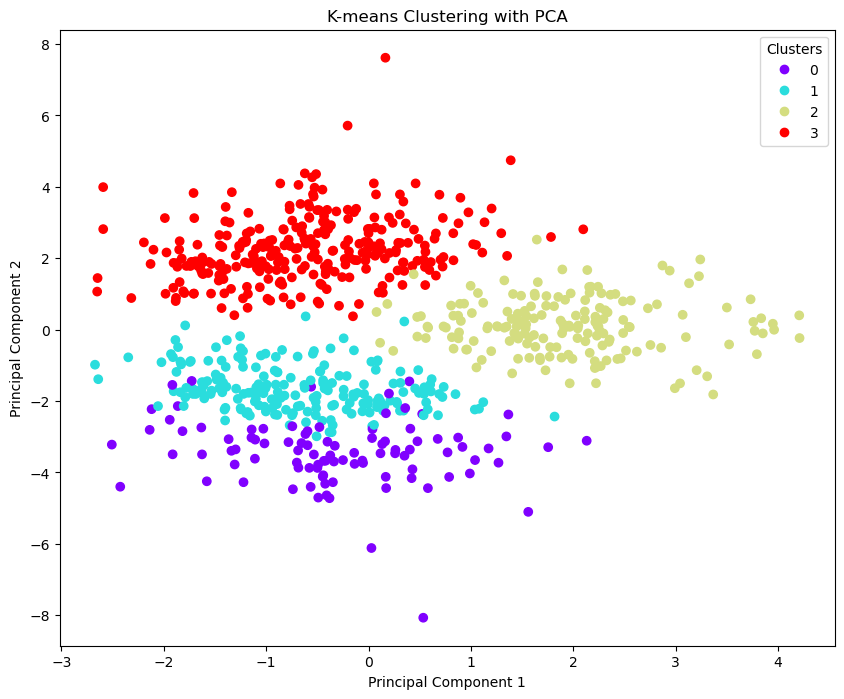

In [11]:
# Perform PCA to reduce to 2 dimensions

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC2'], pca_df['PC1'], c=pca_df['Cluster'], cmap='rainbow')
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


## Supervised learning

In [12]:
# make sure there are no NaN values

df_scaled.isna().sum()


home_or_away            0
team_xG                 0
team_odds               0
opponent_xG             0
opponent_odds           0
team_score              0
opponent_score          0
match_attendance        0
stadium_latitude        0
stadium_longitude       0
stadium_pitch_length    0
stadium_pitch_width     0
score_differential      0
month                   0
day_of_week             0
year                    0
cluster                 0
dtype: int64

In [13]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 1119
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   home_or_away          742 non-null    float64
 1   team_xG               742 non-null    float64
 2   team_odds             742 non-null    float64
 3   opponent_xG           742 non-null    float64
 4   opponent_odds         742 non-null    float64
 5   team_score            742 non-null    float64
 6   opponent_score        742 non-null    float64
 7   match_attendance      742 non-null    float64
 8   stadium_latitude      742 non-null    float64
 9   stadium_longitude     742 non-null    float64
 10  stadium_pitch_length  742 non-null    float64
 11  stadium_pitch_width   742 non-null    float64
 12  score_differential    742 non-null    float64
 13  month                 742 non-null    float64
 14  day_of_week           742 non-null    float64
 15  year                  742 n

In [14]:
# Define features and target variable

X = df_scaled.drop(columns=['cluster'])
y = df_scaled['cluster']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train the Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.94      1.00      0.97        33
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        64

    accuracy                           0.99       149
   macro avg       0.99      0.97      0.98       149
weighted avg       0.99      0.99      0.99       149



In [16]:
# Train the KNeighbors Classifier model

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.82      0.97      0.89        33
           2       0.97      0.97      0.97        34
           3       0.98      0.98      0.98        64

    accuracy                           0.93       149
   macro avg       0.92      0.88      0.89       149
weighted avg       0.94      0.93      0.93       149



In [17]:
# Train the SVC Model

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.89      0.97      0.93        33
           2       1.00      0.94      0.97        34
           3       0.97      1.00      0.98        64

    accuracy                           0.95       149
   macro avg       0.95      0.92      0.93       149
weighted avg       0.95      0.95      0.95       149



In [18]:
# Train the Decision Tree Classifier Model

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.80      0.85      0.82        33
           2       0.94      0.85      0.89        34
           3       0.92      0.94      0.93        64

    accuracy                           0.88       149
   macro avg       0.86      0.85      0.86       149
weighted avg       0.88      0.88      0.88       149



In [19]:
# Train the Random Forest Classifier Model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.94      0.91      0.92        33
           2       0.94      1.00      0.97        34
           3       1.00      0.98      0.99        64

    accuracy                           0.95       149
   macro avg       0.93      0.93      0.93       149
weighted avg       0.95      0.95      0.95       149



In [20]:
# Train the model Gradient Boosting Classifier Model

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.97      0.94      0.95        33
           2       0.97      0.97      0.97        34
           3       0.98      1.00      0.99        64

    accuracy                           0.97       149
   macro avg       0.95      0.95      0.95       149
weighted avg       0.97      0.97      0.97       149



## Feature Importance

In [21]:
# Perform cross-validation on the Gradient Boosting Classifier Model

cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.9261745  0.95302013 0.94594595 0.9527027  0.92567568]
Mean Cross-Validation Score: 0.9407037910393615


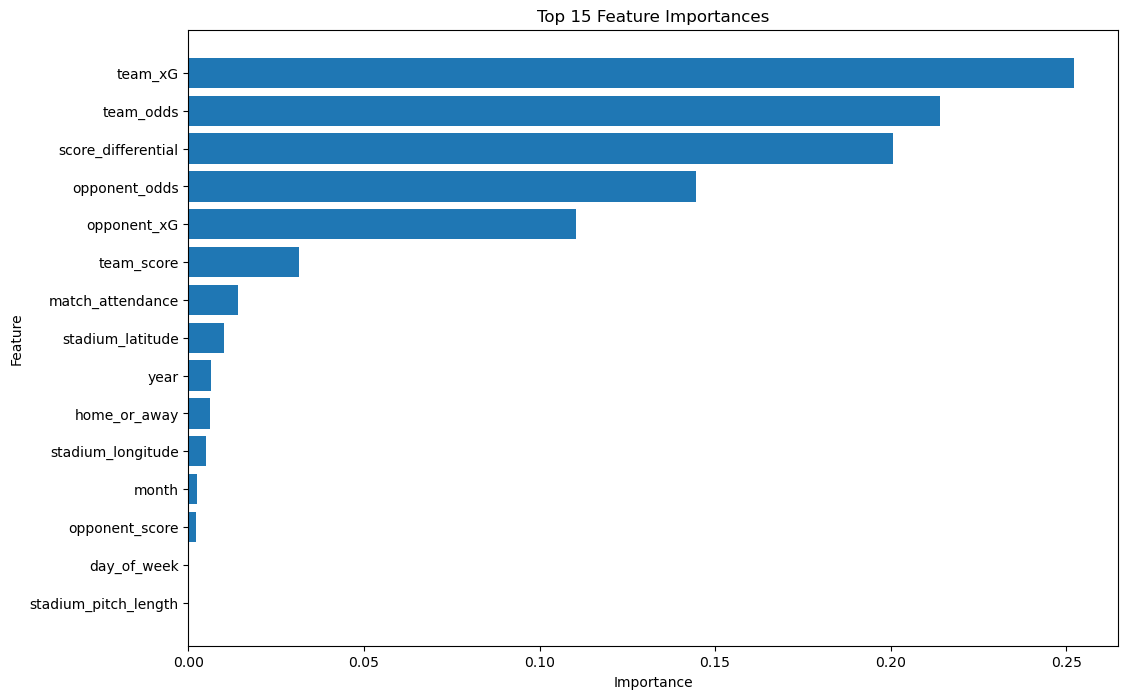

In [22]:
# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Filter the top 15 features
top_features_df = features_df.head(15)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.savefig('feature_importance.png')

plt.show()


In [23]:
# Define features and target variable with emphasis on 'opponent_xG'

important_features = ['opponent_xG'] + [col for col in X_train.columns if col != 'opponent_xG']
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train the model with the re-ordered features
gb_model_important = GradientBoostingClassifier(random_state=42)
gb_model_important.fit(X_train_important, y_train)

# Predict and evaluate
y_pred_important = gb_model_important.predict(X_test_important)
print("Gradient Boosting Classifier Report with Emphasis on opponent_xG:")
print(classification_report(y_test, y_pred_important))


Gradient Boosting Classifier Report with Emphasis on opponent_xG:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.97      0.94      0.95        33
           2       0.97      0.97      0.97        34
           3       0.98      1.00      0.99        64

    accuracy                           0.97       149
   macro avg       0.95      0.95      0.95       149
weighted avg       0.97      0.97      0.97       149



In [24]:
# Perform stratified cross-validation

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb_model_important, X_train_important, y_train, cv=skf, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.94957983 0.94117647 0.94117647 0.91525424 0.94915254]
Mean Cross-Validation Score: 0.9392679105540521


In [25]:
# Hyperparameter tuning for Gradient Boosting

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Retrain the best model
best_modelgb = grid_search.best_estimator_
best_modelgb.fit(X_train, y_train)

# Predict and evaluate
best_predictionsgb = best_modelgb.predict(X_test)
print("Best Gradient Boosting Model Classifier Report:")
print(classification_report(y_test, best_predictionsgb))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best score: 0.9460333285856715
Best Gradient Boosting Model Classifier Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.91      0.91      0.91        33
           2       0.94      0.97      0.96        34
           3       0.98      0.98      0.98        64

    accuracy                           0.94       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.94      0.94      0.94       149



## Top 4 Semi-Final Team Prediction

In [26]:
# Import dataframes

team_data = pd.read_csv("corrected_euro_team_data.csv")

scaled_team_data = pd.read_csv("team_data_scaled.csv")


In [27]:
# # Add in the "target_top_4" column to the scaled dataframe

# scaled_team_data['top_4'] = team_data['target_top_4']

scaled_team_data

,home_or_away,team_xG,team_odds,opponent_xG,opponent_odds,team_score,opponent_score,score_differential,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,month,day_of_week,year,cluster
0,1.0,-0.286851,0.087417,0.179607,-1.004651,1.123480,-0.974849,1.309976,-0.030950,-0.574818,0.319044,0.07581,0.108648,1.181897,0.008835,0.114177,1
1,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,1.123480,-1.309976,-0.000003,-0.205470,-0.274178,0.07581,0.108648,-1.467066,0.503582,1.535044,5
2,1.0,-0.286851,0.087417,-0.753310,0.808564,0.424037,-0.974849,0.873317,-0.255444,-0.574818,0.319044,0.07581,0.108648,1.181897,-0.980659,0.114177,3
3,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,-0.974849,0.000000,-0.000003,-0.574818,0.319044,0.07581,0.108648,-0.331796,-1.475405,-1.306690,3
4,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.275406,-0.275406,0.000000,-0.769129,-0.574818,0.319044,0.07581,0.108648,0.803474,-0.980659,-1.306690,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,-1.0,-0.753310,0.808564,-0.753310,0.808564,0.424037,-0.974849,0.873317,-0.911440,1.087074,0.587489,0.07581,0.108648,0.803474,-1.475405,0.114177,3
1116,1.0,-0.753310,0.808564,1.054217,-1.483853,-0.275406,0.424037,-0.436659,0.120012,0.504158,-1.120904,0.07581,0.108648,-0.331796,-0.485912,-1.306690,0
1117,-1.0,-0.753310,0.808564,1.987134,-1.351158,-0.974849,0.424037,-0.873317,0.447218,-0.584422,1.359299,0.07581,0.108648,-0.331796,-1.475405,0.114177,0
1118,1.0,-0.753310,0.808564,0.937602,-0.948486,-0.974849,-0.275406,-0.436659,0.614994,0.504158,-1.120904,0.07581,0.108648,0.803474,1.493075,-1.306690,0


In [28]:
# Drop the "cluster" column

scaled_team_data.drop(columns=['cluster'], inplace = True)


In [29]:
# Define features and target variable

X = scaled_team_data.drop(columns=['team_xG'])
y = scaled_team_data['team_xG']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Train the LinearRegression model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_model

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.12022385956028704
R² Score: 0.8803021396904271


In [31]:
# Train the SVR model

svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_model

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2067316650590267
R² Score: 0.7941728201348247


In [32]:
# Train the DecisionTreeRegressor model

dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(X_train, y_train)

dtr_model

# Predict and evaluate
y_pred_dtr = dtr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.003414919370772379
R² Score: 0.9966000214657375


In [33]:
# Train the RandomForestRegressor model

rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

rfr_model

# Predict and evaluate
y_pred_rfr = rfr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.002300512796217811
R² Score: 0.9977095523273899


In [34]:
# Train the GradientBoostingRegressor model

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

gb_model

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.001652801820754488
R² Score: 0.9983544294603113


## Predictions

In [35]:
# Add in the "team_code" column to the scaled dataframe

scaled_team_data['team_code'] = team_data['team_code']

scaled_team_data

,home_or_away,team_xG,team_odds,opponent_xG,opponent_odds,team_score,opponent_score,score_differential,match_attendance,stadium_latitude,stadium_longitude,stadium_pitch_length,stadium_pitch_width,month,day_of_week,year,team_code
0,1.0,-0.286851,0.087417,0.179607,-1.004651,1.123480,-0.974849,1.309976,-0.030950,-0.574818,0.319044,0.07581,0.108648,1.181897,0.008835,0.114177,ALB
1,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,1.123480,-1.309976,-0.000003,-0.205470,-0.274178,0.07581,0.108648,-1.467066,0.503582,1.535044,ALB
2,1.0,-0.286851,0.087417,-0.753310,0.808564,0.424037,-0.974849,0.873317,-0.255444,-0.574818,0.319044,0.07581,0.108648,1.181897,-0.980659,0.114177,ALB
3,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.974849,-0.974849,0.000000,-0.000003,-0.574818,0.319044,0.07581,0.108648,-0.331796,-1.475405,-1.306690,ALB
4,1.0,-0.286851,0.087417,-0.753310,0.808564,-0.275406,-0.275406,0.000000,-0.769129,-0.574818,0.319044,0.07581,0.108648,0.803474,-0.980659,-1.306690,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,-1.0,-0.753310,0.808564,-0.753310,0.808564,0.424037,-0.974849,0.873317,-0.911440,1.087074,0.587489,0.07581,0.108648,0.803474,-1.475405,0.114177,WAL
1116,1.0,-0.753310,0.808564,1.054217,-1.483853,-0.275406,0.424037,-0.436659,0.120012,0.504158,-1.120904,0.07581,0.108648,-0.331796,-0.485912,-1.306690,WAL
1117,-1.0,-0.753310,0.808564,1.987134,-1.351158,-0.974849,0.424037,-0.873317,0.447218,-0.584422,1.359299,0.07581,0.108648,-0.331796,-1.475405,0.114177,WAL
1118,1.0,-0.753310,0.808564,0.937602,-0.948486,-0.974849,-0.275406,-0.436659,0.614994,0.504158,-1.120904,0.07581,0.108648,0.803474,1.493075,-1.306690,WAL


In [43]:
# Splitting into features and target variables

team_code = scaled_team_data['team_code']
team_data_features = scaled_team_data.drop(columns=[
    'team_code', 
    'team_xG', 
    'team_odds', 
    'score_differential', 
    'opponent_xG', 
    'opponent_odds'
])

# Standardize the features

scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_data_features)


In [44]:
# Retrain the GradientBoostingRegressor model with the correct features

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(scaled_features, scaled_team_data['team_xG'])  

# Make predictions using the same features used for training

predictions = gb_model.predict(scaled_features)

# Add predictions to the dataframe

scaled_team_data['predicted_score'] = predictions

# Sort teams by the predicted score in descending order

top_teams_sorted = scaled_team_data.sort_values(by='predicted_score', ascending=False)

# Select the top 4 teams

top_4_teams = top_teams_sorted['team_code'].unique()[:4]

top_4_teams


array(['GER', 'ITA', 'ENG', 'POR'], dtype=object)

In [37]:
# Retrain the GradientBoostingRegressor model with the correct features

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(scaled_features, scaled_team_data['team_odds'])  

# Make predictions using the same features used for training

predictions = gb_model.predict(scaled_features)

# Add predictions to the dataframe

scaled_team_data['predicted_score'] = predictions

# Sort teams by the predicted score in descending order

top_teams_sorted = scaled_team_data.sort_values(by='predicted_score', ascending=True)

# Select the top 4 teams

top_4_teams = top_teams_sorted['team_code'].unique()[:4]

top_4_teams

array(['ENG', 'ITA', 'NED', 'AUT'], dtype=object)

In [46]:
# Retrain the GradientBoostingRegressor model with the correct features

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(scaled_features, scaled_team_data['score_differential'])  

# Make predictions using the same features used for training

predictions = gb_model.predict(scaled_features)

# Add predictions to the dataframe

scaled_team_data['predicted_score'] = predictions

# Sort teams by the predicted score in descending order

top_teams_sorted = scaled_team_data.sort_values(by='predicted_score', ascending=False)

# Select the top 4 teams

top_4_teams = top_teams_sorted['team_code'].unique()[:4]

top_4_teams

array(['FRA', 'POR', 'GEO', 'ISL'], dtype=object)

In [39]:
# Retrain the GradientBoostingRegressor model with the correct features

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(scaled_features, scaled_team_data['opponent_xG'])  

# Make predictions using the same features used for training

predictions = gb_model.predict(scaled_features)

# Add predictions to the dataframe

scaled_team_data['predicted_score'] = predictions

# Sort teams by the predicted score in descending order

top_teams_sorted = scaled_team_data.sort_values(by='predicted_score', ascending=False)

# Select the top 4 teams

top_4_teams = top_teams_sorted['team_code'].unique()[:4]

top_4_teams

array(['ITA', 'GER', 'ENG', 'USA'], dtype=object)

In [42]:
# Retrain the GradientBoostingRegressor model with the correct features

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(scaled_features, scaled_team_data['opponent_odds'])  

# Make predictions using the same features used for training

predictions = gb_model.predict(scaled_features)

# Add predictions to the dataframe

scaled_team_data['predicted_score'] = predictions

# Sort teams by the predicted score in descending order

top_teams_sorted = scaled_team_data.sort_values(by='predicted_score', ascending=True)

# Select the top 4 teams

top_4_teams = top_teams_sorted['team_code'].unique()[:4]

top_4_teams

array(['GER', 'UKR', 'GIB', 'ITA'], dtype=object)